In [105]:
import time
from tqdm import tqdm
from IPython.display import display
import matplotlib.pyplot as plt

In [106]:
wave_buff = high_finesse_wavemeter_remote.get_wavelength_buffer()
factor_sigma = float((np.max(np.array(wave_buff)) - np.min(np.array(wave_buff)) )/ 0.02)

In [107]:
number_of_repeats = 1
powers = [120, 130, 150, 170, 190, 200, 250] #
ple_gui._mw.number_of_repeats_SpinBox.setValue(number_of_repeats)
ple_gui._mw.number_of_repeats_SpinBox.editingFinished.emit()
fits = []
for power in powers:
        ple_gui._controller_logic.sigGuiParamsUpdated.emit({"power": power})
        # do a scan
        time.sleep(2)
        ple_gui._mw.actionToggle_scan.setChecked(True)
        ple_gui.toggle_scan()
        while laser_scanner_logic.module_state()=='locked':
                time.sleep(1)
        ple_gui._fit_dockwidget.fit_widget.sigDoFit.emit("Lorentzian")
        fwhm = 2 * factor_sigma * ple_gui.fit_result[1].best_values['sigma'] / 1e6
        ple_gui.save_path_widget.saveTagLineEdit.setText(f"saturation_res{power}_repump_blue")
        fits.append(float(fwhm))

KeyboardInterrupt: 

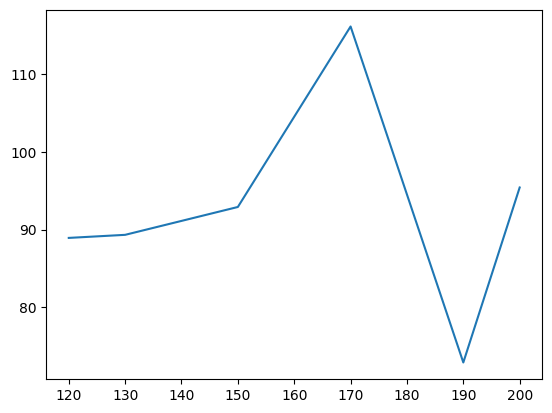

In [ ]:
plt.plot(powers[::-1], fits)

In [ ]:
def go_to_poi(ref_poi, poi_cur):
    pml.go_to_poi(ref_poi)
    time.sleep(5)
    pml.go_to_poi(poi_cur)
    time.sleep(5)
    for i in range(2):
        scanning_optimize_logic.start_optimize()
        while scanning_optimize_logic.module_state()=='locked':
            time.sleep(1)

In [ ]:
def start_ple(self):
    #wavemeter._wavelength_buffer = []
    #self._laser_controller.etalon_voltage = self.eta
    #powercontroller_logic.motor_position = power

    #self._ple_started = True
    ple_gui._mw.actionToggle_scan.setChecked(True)
    ple_gui.toggle_scan()
    #self._ple_gui._mw.actionToggle_scan.triggered.emit()
    
    return

In [ ]:
laser_scanner_logic

<qudi.logic.ple.ple_scanner_logic.PLEScannerLogic(0x26ffed55730) at 0x0000026F800CB280>

In [ ]:
powers = []

In [ ]:
def run_saturation(average_times = 1):
    # set number of scans
    ple_gui._mw.number_of_repeats_SpinBox.setValue(average_times)
    ple_gui._mw.number_of_repeats_SpinBox.editingFinished.emit()

    # do a scan
    while laser_scanner_logic.module_state()=='locked':
            time.sleep(1)
    ple_gui._fit_dockwidget.fit_widget.sigDoFit.emit()
    #Do fit
    #Save in a seaprate folder
    #append the scan
    odmr.save_odmr_data(tag=f'ROI1_POI={poi_cur}')

In [ ]:
def run_auto_ple(poi_names):
    ref_poi = 'ref_auto_poi'
    for poi_cur in poi_names:
        go_to_poi(ref_poi, poi_cur)
        odmr.start_odmr_scan()
        while odmr.module_state()=='locked':
            time.sleep(1)
        odmr.save_odmr_data(tag=f'ROI1_POI={poi_cur}')
        time.sleep(2)

In [ ]:
poi_names = pml.poi_names
poi_names = poi_names[:-1]
poi_names

NameError: name 'pml' is not defined